In [107]:
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import plotly.express as pi
import seaborn as sns
from langdetect import detect
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import re
import emoji

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer



# Data Analysis

In [108]:
train_tweets = pd.read_csv('mediaeval-2015-trainingset.txt', sep='\\t', engine='python', encoding='utf-8')
test_tweets = pd.read_csv('mediaeval-2015-testset.txt', sep='\\t', engine='python', encoding='utf-8')
train_tweets.sample(5)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
3591,264161875674144768,Jajajajaja ya puedes volver a colombia @hassam...,164022728,sandyA_fake_42,Jhonsi_Alex,Fri Nov 02 00:27:54 +0000 2012,fake
11723,264484107478781952,Faith in humanity restored. #sandy #aftermath ...,56075745,sandyB_real_71,steviebird,Fri Nov 02 21:48:19 +0000 2012,real
6446,263084323232686080,Sandy is not fucking around... http://t.co/EJa...,39647780,sandyA_fake_29,supamario769,Tue Oct 30 01:06:05 +0000 2012,fake
13911,431776368724946944,Photo Proof! Sochi Olympics Is a Huge Mess! h...,821187889,sochi_fake_10,jons_Stuners,Fri Feb 07 13:08:03 +0000 2014,humor
7053,262998356446572544,Cool pic of #hurricanesandy over NYC http://t....,122377123,sandyA_fake_14,TrainerAndrei,Mon Oct 29 19:24:29 +0000 2012,fake


In [109]:
test_tweets.sample(5)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
2666,533226679205105665,Hero Syrian Boy Saves His Sister From Syrian A...,114286627,syrianboy_1,candelario1955,Fri Nov 14 11:55:21 +0000 2014,fake
3056,532222061977272322,Watch: Syrian 'hero boy' appears to brave snip...,18430860,syrianboy_1,littlerosy15,Tue Nov 11 17:23:22 +0000 2014,fake
1223,591987299925131264,Nepal's historic Dharahara Tower collapses in ...,245173212,nepal_25,Harley_Organic,Sat Apr 25 15:29:05 +0000 2015,real
182,578838745824256000,http://t.co/eWNlCBVvDD #SolarEclipse #Zonsverd...,15738387,eclipse_07,observer1,Fri Mar 20 08:41:25 +0000 2015,real
580,592595287815757825,Never ending Love Of #Husband &amp; #Wife a sn...,2694735694,nepal_05,Sureshvj22,Mon Apr 27 07:45:01 +0000 2015,fake


In [110]:
train_tweets.columns

Index(['tweetId', 'tweetText', 'userId', 'imageId(s)', 'username', 'timestamp',
       'label'],
      dtype='object')

In [111]:
test_tweets.columns

Index(['tweetId', 'tweetText', 'userId', 'imageId(s)', 'username', 'timestamp',
       'label'],
      dtype='object')

In [112]:
train_tweets.rename(columns={'imageId(s)': 'images'}, inplace=True)
test_tweets.rename(columns={'imageId(s)': 'images'}, inplace=True)
train_tweets.sample(1)

,tweetId,tweetText,userId,images,username,timestamp,label
12063,264022663431876608,#Sandy on Cuba http://t.co/p69nREsj,84185313,sandyB_real_10,doropeaton,Thu Nov 01 15:14:42 +0000 2012,real


In [113]:
test_tweets.sample(1)

,tweetId,tweetText,userId,images,username,timestamp,label
1652,591987465520459776,Nepal's historic Dharahara Tower collapses in ...,1614704773,nepal_25,adsociale,Sat Apr 25 15:29:45 +0000 2015,real


In [114]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetId    14483 non-null  int64 
 1   tweetText  14483 non-null  object
 2   userId     14483 non-null  int64 
 3   images     14483 non-null  object
 4   username   14483 non-null  object
 5   timestamp  14483 non-null  object
 6   label      14483 non-null  object
dtypes: int64(2), object(5)
memory usage: 792.2+ KB


In [115]:
test_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetId    3781 non-null   int64 
 1   tweetText  3781 non-null   object
 2   userId     3781 non-null   int64 
 3   images     3781 non-null   object
 4   username   3781 non-null   object
 5   timestamp  3781 non-null   object
 6   label      3781 non-null   object
dtypes: int64(2), object(5)
memory usage: 206.9+ KB


In [116]:
#checks for any null entries
np.sum(train_tweets.isnull().any(axis=1))

0

In [117]:
np.sum(test_tweets.isnull().any(axis=1))

0

In [118]:
print(train_tweets.shape)
print(test_tweets.shape)

(14483, 7)
(3781, 7)


In [119]:
#print the total number of images and their frequencies in the training data
image_ids = train_tweets['images'].value_counts()

# Print the counts
print("Number of different items and their counts:")
print(image_ids)



Number of different items and their counts:
images
sandyA_fake_29                   1115
sandyA_fake_42                    722
sandyA_fake_11                    638
sandyB_real_59                    634
sandyB_real_71                    585
                                 ... 
boston_real_23                      1
boston_real_01,boston_real_02       1
sandyB_real_95                      1
columbianChemicals_fake_04          1
sandyB_real_21                      1
Name: count, Length: 379, dtype: int64


Image ID Total
--------------------------------
sandyA	9860
sandyB	2663
boston	546
malaysia	501
sochi	402
columbianChemicals	185
bringback	131
underwater	113
passport	46
pigFish	14
elephant	13
livr	9


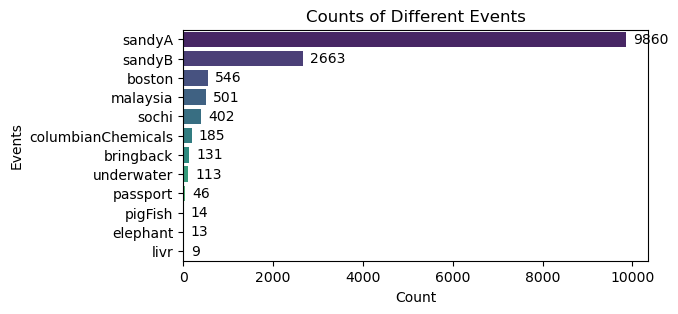

In [120]:
#prints the number of images for specific events from training data

image_ids = train_tweets['images']

# Extract the part before the underscore and count occurrences
image_ids_without_numbers = image_ids.str.split('_').str[0]
counts_without_numbers = image_ids_without_numbers.value_counts()

# Print the counts in a tabular format
print("Image ID Total")
print("--------------------------------")
for image_id, count in counts_without_numbers.items():
    print(f"{image_id}\t{count}")
    
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
ax = sns.barplot(x=counts_without_numbers.values, y=counts_without_numbers.index, hue=counts_without_numbers.index, palette='viridis', legend=False)

# Display the actual numbers at the end of each bar without decimals
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Counts of Different Events')
plt.xlabel('Count')
plt.ylabel('Events')
plt.show()

In [121]:
#print the total number of images and their frequencies in the test data
image_ids = test_tweets['images'].value_counts()

# Print the counts
print("Number of different items and their counts:")
print(image_ids)

Number of different items and their counts:
images
syrianboy_1              1786
nepal_25                  801
nepal_01                  140
samurai_02                106
samurai_01,samurai_02     102
                         ... 
eclipse_01                  1
nepal_07                    1
nepal_15                    1
nepal_08                    1
eclipse_04                  1
Name: count, Length: 88, dtype: int64


Image ID (without numbers)
--------------------------------
syrianboy	1786
nepal	1360
eclipse	277
samurai	218
garissa	79
varoufakis	61


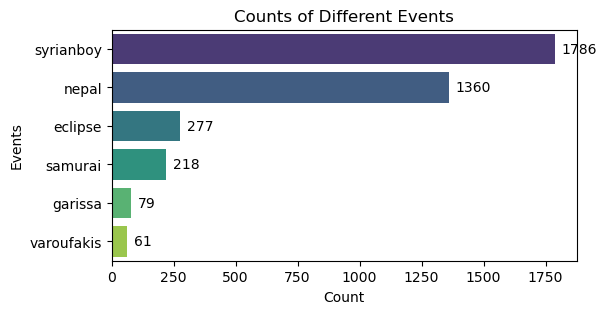

In [122]:
#prints the number of images for specific events from test data

image_ids = test_tweets['images']

# Extract the part before the underscore and count occurrences
image_ids_without_numbers = image_ids.str.split('_').str[0]
counts_without_numbers = image_ids_without_numbers.value_counts()

# Print the counts in a tabular format
print("Image ID (without numbers)")
print("--------------------------------")
for image_id, count in counts_without_numbers.items():
    print(f"{image_id}\t{count}")
    
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
ax = sns.barplot(x=counts_without_numbers.values, y=counts_without_numbers.index, hue=counts_without_numbers.index, palette='viridis', legend=False)

# Display the actual numbers at the end of each bar without decimals
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Counts of Different Events')
plt.xlabel('Count')
plt.ylabel('Events')
plt.show()


In [123]:
#converting the labels to numbers
#humour and fake considered to be the same
label_mapping = {'fake': 1, 'humor': 1, 'real': 0}

# Map values in the 'label' column for train_tweets
train_tweets['label'] = train_tweets['label'].map(label_mapping)

# Map values in the 'label' column for test_tweets
test_tweets['label'] = test_tweets['label'].map(label_mapping)

train_tweets.sample(5)

,tweetId,tweetText,userId,images,username,timestamp,label
6620,263083836253011968,http://t.co/u8LyfBg5 Hurricane Sandy...... mie...,49714606,sandyA_fake_09,BrokeMyHeart_,Tue Oct 30 01:04:09 +0000 2012,1
8806,263136361656242176,#WTF #hurricane #hurricanesandy #sandy #nyc #e...,21734028,sandyA_real_20,djlilrye,Tue Oct 30 04:32:52 +0000 2012,0
10929,265135400442556417,The #Sandy cover for @NYMag this week is beaut...,149320829,sandyB_real_59,elenaachristt,Sun Nov 04 16:56:20 +0000 2012,0
13999,446205814240321536,MH370 found in near Bermuda Triangle http://t....,634159957,malaysia_fake_11,sayfull46,Wed Mar 19 08:45:30 +0000 2014,1
10114,264056053124194305,RT @Alyssa_Milano Thank goodness for people wh...,14595574,sandyB_real_71,hardlynormal,Thu Nov 01 17:27:23 +0000 2012,0


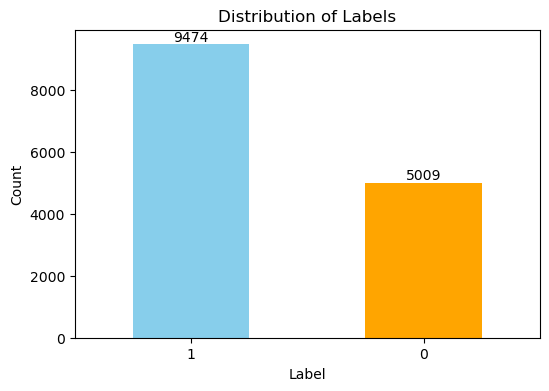

In [124]:
#number of fake and real labels (0 and 1)
label_counts = train_tweets['label'].value_counts()

# Plotting a bar plot with annotations
plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Adding annotations on top of the bars
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

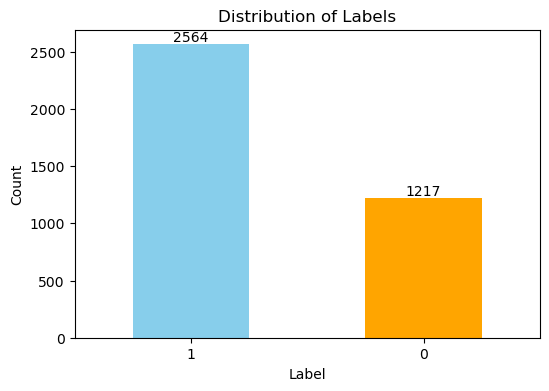

In [125]:
label_counts = test_tweets['label'].value_counts()

# Plotting a bar plot with annotations
plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Adding annotations on top of the bars
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

# Data Pre-processing ( + Analysis of Languages)

In [126]:
#removing columns that are not of use
columns_to_drop = ["tweetId", "userId", "timestamp"]
train_tweets.drop(columns=columns_to_drop, inplace=True)
test_tweets.drop(columns=columns_to_drop, inplace=True)
test_tweets.head()

,tweetText,images,username,label
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,eclipse_01,peay_s,1
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,eclipse_01,JaredUcanChange,1
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,eclipse_01,tpjp1231,1
3,Eclipse from ISS.... http://t.co/En87OtvsU6,eclipse_01,Shyman33,1
4,"""@ebonfigli: Éclipse vue de l'ISS... Autre cho...",eclipse_01,Epimethee_,1


In [127]:

# function to perform text preprocessing (Noise removed, Lowercase, URLs removed)
preprocess_text = lambda text: re.sub("[^a-zA-Z ]+", "", re.split('http.*', str(text))[0].lower())

# Applying the text preprocessing function to create the 'ProcessedText' column for training data
train_tweets['ProcessedText'] = train_tweets['tweetText'].apply(preprocess_text)

# Applying the same text preprocessing function to create the 'ProcessedText' column for test data
test_tweets['ProcessedText'] = test_tweets['tweetText'].apply(preprocess_text)


In [128]:
train_tweets.sample(5)

,tweetText,images,username,label,ProcessedText
12432,"Just spotted this: how some in #Hoboken, #NewJ...",sandyB_real_71,thisisjohnbook,0,just spotted this how some in hoboken newjerse...
4258,Sandy's coming. #staysafe http://t.co/fGwQ5MY9,sandyA_fake_42,Luke_Walker91,1,sandys coming staysafe
3756,Espectacular foto de #Sandy \n#scary http://t....,sandyA_fake_08,JoeLMutantE,1,espectacular foto de sandy nscary
10873,"Wow, cover of new issue of @NYmag is amazing. ...",sandyB_real_59,tanzio,0,wow cover of new issue of nymag is amazing
7895,"Ground zero, flooded (via ap) #HurricaneSandy ...",sandyA_real_04,thiago_sp,0,ground zero flooded via ap hurricanesandy sand...


In [129]:
#funciton to detect languages in the data
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"
train_tweets['detected_language'] = train_tweets['ProcessedText'].apply(detect_language)
total_languages = train_tweets['detected_language'].nunique()
print(f"Total number of unique languages detected: {total_languages}")

Total number of unique languages detected: 32


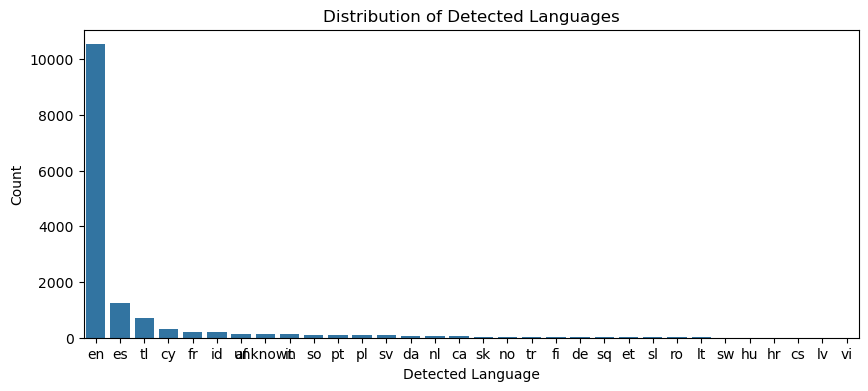

In [130]:
#bar chart showing the number of different languages
plt.figure(figsize=(10, 4))
sns.countplot(x='detected_language', data=train_tweets, order=train_tweets['detected_language'].value_counts().index)
plt.title('Distribution of Detected Languages')
plt.xlabel('Detected Language')
plt.ylabel('Count')
plt.show()

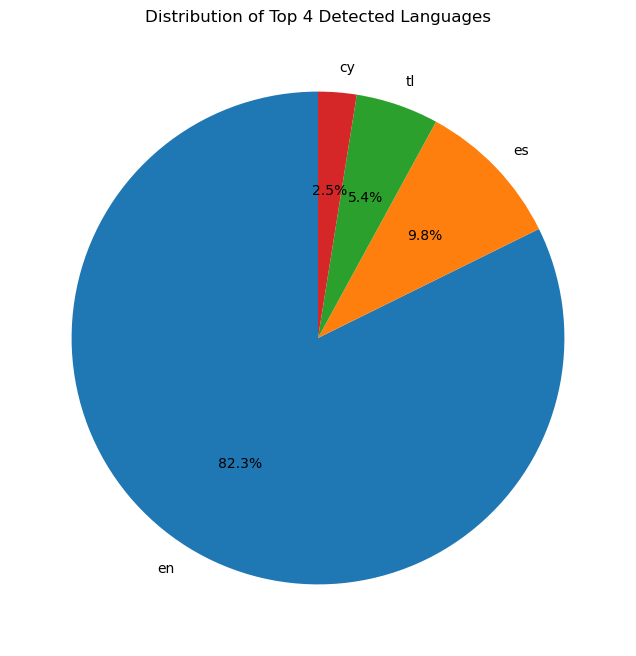

In [131]:
#plot a pie chart for the top 4 languages

top_languages = train_tweets['detected_language'].value_counts().nlargest(4).index

# Filter the DataFrame for the top languages
filtered_train_tweets = train_tweets[train_tweets['detected_language'].isin(top_languages)]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_train_tweets['detected_language'].value_counts(), labels=filtered_train_tweets['detected_language'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 4 Detected Languages')
plt.show()

In [132]:
from translate import Translator

# Function to translate text using the translate library --> not used due to lack of computational power
#def my_translate(text, target_language='en'):
#    try:
#        translator = Translator(to_lang=target_language)
#        translated_text = translator.translate(text)
#        return translated_text
#    except Exception as e:
#        print(f"Translation failed: {e}")
#        return None

# Apply translation to 'ProcessedText' column in train_tweets
#train_tweets['translatedText'] = train_tweets['ProcessedText'].apply(my_translate)

In [133]:

train_tweets.head()

,tweetText,images,username,label,ProcessedText,detected_language
0,¿Se acuerdan de la película: “El día después d...,sandyA_fake_46,iAnnieM,1,se acuerdan de la pelcula el da despus de maan...,es
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,sandyA_fake_09,CarlosVerareal,1,milenagimon miren a sandy en ny tremenda imag...,es
2,"Buena la foto del Huracán Sandy, me recuerda a...",sandyA_fake_09,LucasPalape,1,buena la foto del huracn sandy me recuerda a l...,es
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,sandyA_fake_29,Haaaaarryyy,1,scary shit hurricane ny,en
4,My fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,princess__natt,1,my fave place in the world nyc hurricane sandy...,en


In [134]:
#counting repeated tweets
train_tweets['ProcessedText'].duplicated().sum()


3303

In [135]:
#removing duplicates 
train_tweets.drop_duplicates(subset=['ProcessedText'], keep='first', inplace=True, ignore_index=False)
train_tweets['ProcessedText'].duplicated().sum()


0

In [136]:
test_tweets.head()

,tweetText,images,username,label,ProcessedText
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,eclipse_01,peay_s,1,kereeen rt shyman eclipse from iss
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,eclipse_01,JaredUcanChange,1,absolutely beautiful rt shyman eclipse from iss
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,eclipse_01,tpjp1231,1,shyman eclipse from iss
3,Eclipse from ISS.... http://t.co/En87OtvsU6,eclipse_01,Shyman33,1,eclipse from iss
4,"""@ebonfigli: Éclipse vue de l'ISS... Autre cho...",eclipse_01,Epimethee_,1,ebonfigli clipse vue de liss autre chose


In [137]:
#function to remove english stopwords
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    words = str(text).split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return " ".join(filtered_words)
#function to remove spanish stopwords
stopwords_set_es = set(stopwords.words('spanish'))
def remove_stopwords_es(text):
    words = str(text).split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return " ".join(filtered_words)

In [138]:
#apply the funciton to both the test and training set
test_tweets['ProcessedText'] = test_tweets['ProcessedText'].apply(remove_stopwords)
train_tweets['ProcessedText'] = train_tweets['ProcessedText'].apply(remove_stopwords)

test_tweets['ProcessedText'] = test_tweets['ProcessedText'].apply(remove_stopwords_es)
train_tweets['ProcessedText'] = train_tweets['ProcessedText'].apply(remove_stopwords_es)

In [139]:
#funciton to remove emojis from the Processed tweets

def remove_emojis(text):
    return emoji.demojize(text)

# Apply the remove_emojis function to the 'ProcessedText' column
train_tweets['ProcessedText'] = train_tweets['ProcessedText'].apply(remove_emojis)
test_tweets['ProcessedText'] = test_tweets['ProcessedText'].apply(remove_emojis)


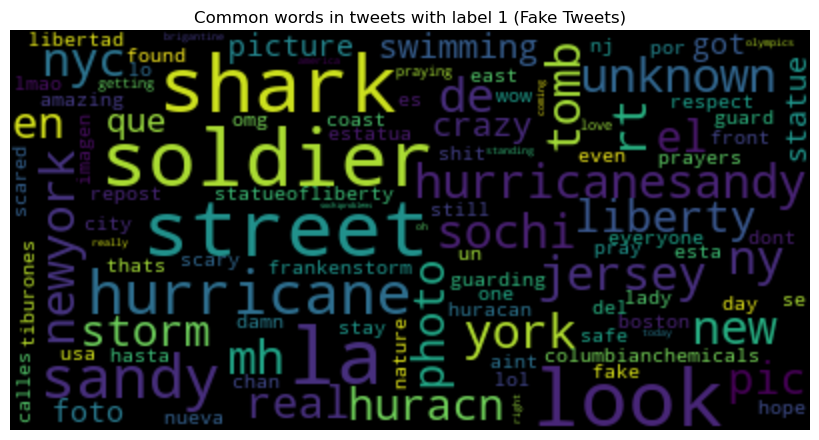

In [140]:
#generating word cloud

def generate_wordcloud_for_label(text_data, label_data, label_value=1, max_words=110, max_font_size=40):
    # Filter text data based on the label
    filtered_text_data = text_data[label_data == label_value]
    
    # Count the occurrences of each word
    word_counter = Counter(" ".join(filtered_text_data).split())
    
    # Select the top words
    top_words = [word for (word, count) in word_counter.most_common(max_words)]
    
    # Generate Word Cloud
    wordcloud = WordCloud(max_words=max_words, max_font_size=max_font_size, background_color='black').generate(" ".join(top_words))
    
    # Display the Word Cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"Common words in tweets with label {label_value} (Fake Tweets)")
    plt.tight_layout(pad=0)
    
    # Show the plot
    plt.show()

# Example usage:
generate_wordcloud_for_label(train_tweets['ProcessedText'], train_tweets['label'])


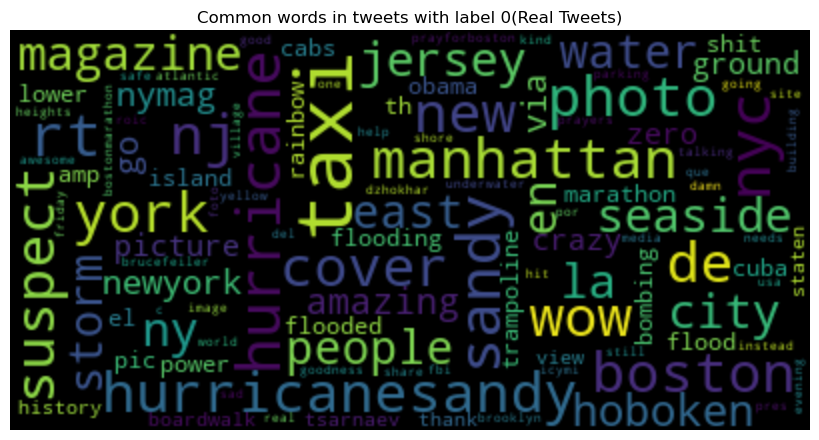

In [141]:
#generating word cloud

def generate_wordcloud_for_label(text_data, label_data, label_value=0, max_words=110, max_font_size=40):
    # Filter text data based on the label
    filtered_text_data = text_data[label_data == label_value]
    
    # Count the occurrences of each word
    word_counter = Counter(" ".join(filtered_text_data).split())
    
    # Select the top words
    top_words = [word for (word, count) in word_counter.most_common(max_words)]
    
    # Generate Word Cloud
    wordcloud = WordCloud(max_words=max_words, max_font_size=max_font_size, background_color='black').generate(" ".join(top_words))
    
    # Display the Word Cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"Common words in tweets with label {label_value}(Real Tweets)")
    plt.tight_layout(pad=0)
    
    # Show the plot
    plt.show()

# Example usage:
generate_wordcloud_for_label(train_tweets['ProcessedText'], train_tweets['label'])

# Algorithm Training

In [142]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [143]:
test_tweets.head()

,tweetText,images,username,label,ProcessedText
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,eclipse_01,peay_s,1,kereeen rt shyman eclipse iss
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,eclipse_01,JaredUcanChange,1,absolutely beautiful rt shyman eclipse iss
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,eclipse_01,tpjp1231,1,shyman eclipse iss
3,Eclipse from ISS.... http://t.co/En87OtvsU6,eclipse_01,Shyman33,1,eclipse iss
4,"""@ebonfigli: Éclipse vue de l'ISS... Autre cho...",eclipse_01,Epimethee_,1,ebonfigli clipse vue de liss autre chose


# Bag of words with MNB

In [144]:
#Bag-of-Words with MNB
pipeline_bow = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [145]:
#fitting MNb with B-o-w

# Fit the model on training data
mnb_model_bow = pipeline_bow.fit(train_tweets['ProcessedText'], train_tweets['label'])
# Predict on test data
mnb_pred_bow = mnb_model_bow.predict(test_tweets['ProcessedText'])

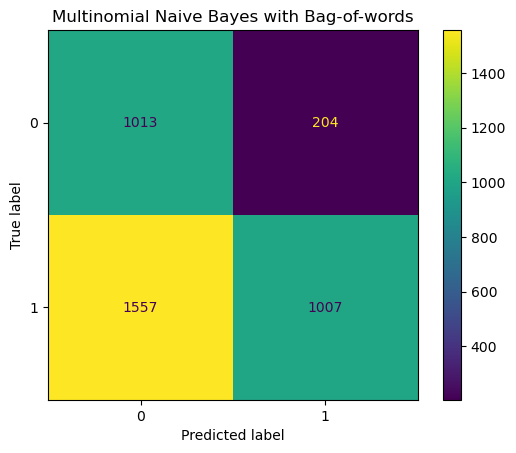

F1: 0.5342501983602221


In [146]:
# Calculate metrics
mnb_f1 = f1_score(test_tweets['label'], mnb_pred_bow, average="micro")


# Display Confusion Matrix using ConfusionMatrixDisplay
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(pipeline_bow, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Multinomial Naive Bayes with Bag-of-words")

plt.show()
print(f"F1: {mnb_f1}")


# Applying TF-IDF vectorisation to MNB

In [147]:
#forming pipepline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

mnb_TfIdf_model = pipeline.fit(train_tweets['ProcessedText'], train_tweets['label'])
mnb_TfIdf_pred = mnb_TfIdf_model.predict(test_tweets['ProcessedText'])



0.8756942607775721
{'Classifier': 'MultinomialNB TF-IDF', 'F1 Score': 0.8756942607775721}


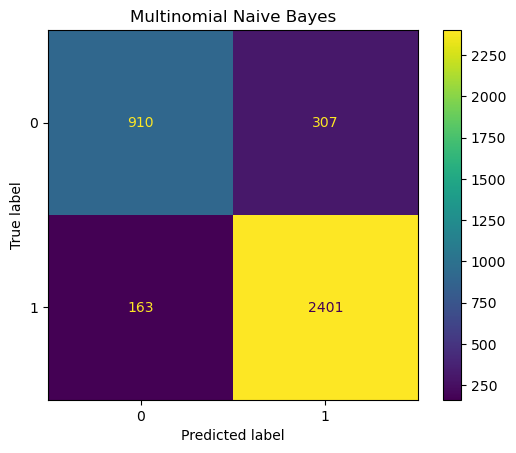

In [148]:

#calcualting metric
mnb_f1_tfIdf = f1_score(test_tweets['label'], mnb_TfIdf_pred, average="micro")


# Display Confusion Matrix using ConfusionMatrixDisplay
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(mnb_TfIdf_model, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Multinomial Naive Bayes")

print(mnb_f1_tfIdf)
#Save metrics in a dictionary
mnb_row = {'Classifier': 'MultinomialNB TF-IDF', 'F1 Score': mnb_f1_tfIdf,}
print(mnb_row)


# concatenating usernames and Processedtweets 

0.8865379529225073


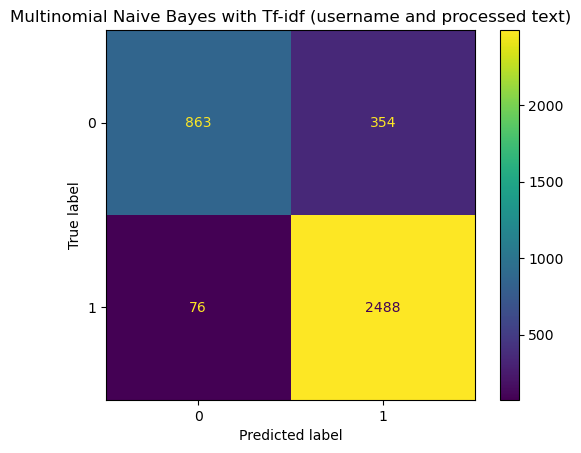

In [149]:


combined_data = train_tweets['ProcessedText'] + ' ' + train_tweets['username'] 
mnb_model = pipeline.fit(combined_data, train_tweets['label'])
mnb_pred = mnb_model.predict(test_tweets['ProcessedText'] + ' ' + test_tweets['username'])

# ...

# Calculate metrics

mnb_f1 = f1_score(test_tweets['label'], mnb_pred, average="micro")


# Display Confusion Matrix using ConfusionMatrixDisplay
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(mnb_model, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Multinomial Naive Bayes with Tf-idf (username and processed text)")

print(mnb_f1)


# Grid Search applied for Hyperparameter tuning

Best Parameters (TF-IDF): {'clf__alpha': 0.5, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}
F1 Score with Grid Search (TF-IDF): 0.8677598518910341


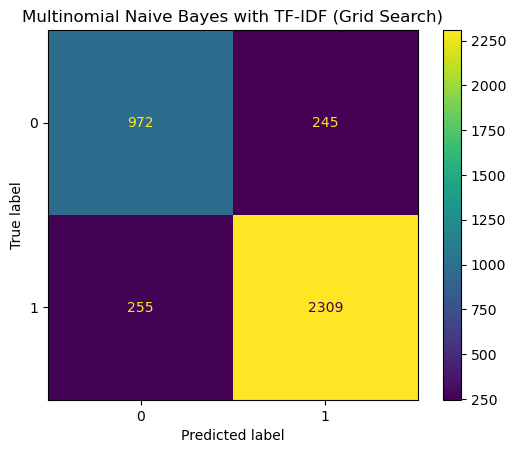

In [150]:
from sklearn.model_selection import GridSearchCV

pipeline_tfidf = Pipeline([
    ('vect', TfidfVectorizer()),   # Use TfidfVectorizer for TF-IDF
    ('clf', MultinomialNB())       # Multinomial Naive Bayes classifier
])

# Define the hyperparameters and values to search
param_grid_tfidf = {
    'vect__max_features': [1000, 5000, 10000],
    'vect__ngram_range': [(1, 1), (1, 2)],  # Example values for ngram_range
    'vect__use_idf': [True, False],         # Example values for use_idf in TfidfVectorizer
    'clf__alpha': [0.1, 0.5, 1.0],          # Example values for alpha in MultinomialNB
}
# Create the GridSearchCV object
grid_search_tfidf = GridSearchCV(pipeline_tfidf, param_grid_tfidf, cv=5, scoring='f1_micro')

# Fit the grid search to the data
grid_search_tfidf.fit(train_tweets['ProcessedText'], train_tweets['label'])

# Get the best parameters and the best model
best_params_tfidf = grid_search_tfidf.best_params_
best_model_tfidf = grid_search_tfidf.best_estimator_

# Predict on test data using the best model
grid_pred_tfidf = best_model_tfidf.predict(test_tweets['ProcessedText'])

# Calculate metrics using the best model
grid_score_tfidf = accuracy_score(test_tweets['label'], grid_pred_tfidf)
grid_f1_tfidf = f1_score(test_tweets['label'], grid_pred_tfidf, average="micro")
grid_precision_tfidf = precision_score(test_tweets['label'], grid_pred_tfidf, average='micro')
grid_recall_tfidf = recall_score(test_tweets['label'], grid_pred_tfidf, average='micro')

# Display Confusion Matrix using ConfusionMatrixDisplay
conf_matrix_display_tfidf = ConfusionMatrixDisplay.from_estimator(best_model_tfidf, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Multinomial Naive Bayes with TF-IDF (Grid Search)")

print("Best Parameters (TF-IDF):", best_params_tfidf)
print("F1 Score with Grid Search (TF-IDF):", grid_f1_tfidf)

# Save metrics in a dictionary
grid_row_tfidf = {'Classifier': 'MultinomialNB(TF-IDF, GridSearch)', 'Accuracy': grid_score_tfidf, 'F1 Score': grid_f1_tfidf, 'Precision': grid_precision_tfidf, 'Recall': grid_recall_tfidf}



# Bag of words with SVC

F1 Score (SVM with BoW): 0.543964276622232


Text(0.5, 1.0, 'Support Vector Machine with BoW vectorisation')

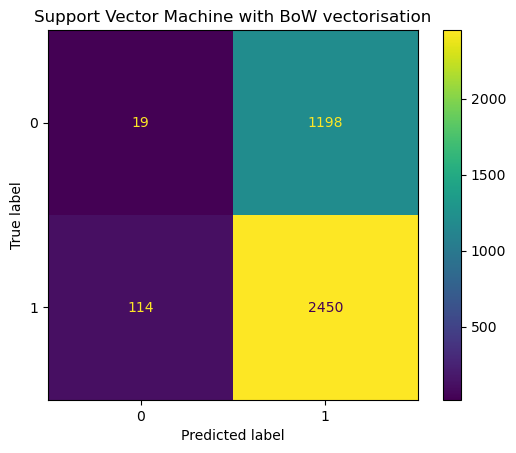

In [151]:
svm_pipeline_bow = Pipeline([
    ('vect', CountVectorizer()), 
    ('clf', SVC())  # Support Vector Machine classifier
])

# Fit the SVM model to the training data using BoW representation
svm_model_bow = svm_pipeline_bow.fit(train_tweets['ProcessedText'], train_tweets['label'])

# Make predictions on the test data
svm_pred_bow = svm_model_bow.predict(test_tweets['ProcessedText'])

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate F1 score for SVM predictions using BoW
svm_f1_bow = f1_score(test_tweets['label'], svm_pred_bow, average='weighted')
print(f"F1 Score (SVM with BoW): {svm_f1_bow}")

# Display Confusion Matrix for SVM with BoW
conf_matrix_display_svm_bow = ConfusionMatrixDisplay.from_estimator(svm_pipeline_bow, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Support Vector Machine with BoW vectorisation")

# SVC with TF-IDF

In [152]:
# Define the pipeline with TF-IDF vectorization and SVM
svm_tfidf_pipeline = Pipeline([
    #('tfidf_vect', TfidfVectorizer(ngram_range=(1, 1))),
    ('tfidf_vect', TfidfVectorizer(ngram_range=(1, 2))), #n-gram range changed to attempt to include bigrams, however it only lowered the data 
    ('clf', SVC())  # Support Vector Machine classifier
])

# Fit the SVM model with TF-IDF vectorization to the training data
svm_tfidf_model = svm_tfidf_pipeline.fit(train_tweets['ProcessedText'], train_tweets['label'])

# Make predictions on the test data
svm_tfidf_pred = svm_tfidf_model.predict(test_tweets['ProcessedText'])

F1 Score (SVM with TF-IDF): 0.5461091979502684


Text(0.5, 1.0, 'Support Vector Machine with TF-IDF vectorization')

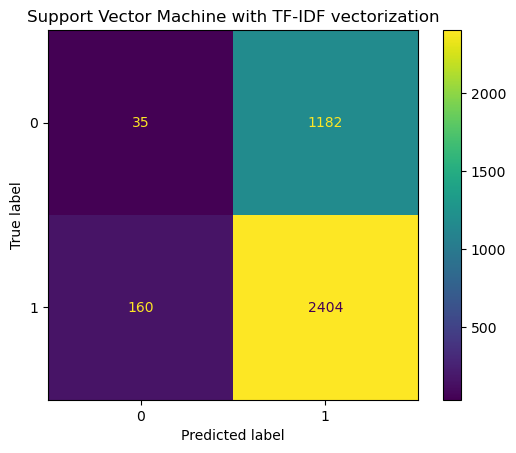

In [153]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate F1 score for SVM with TF-IDF predictions
svm_tfidf_f1 = f1_score(test_tweets['label'], svm_tfidf_pred, average='weighted')
print(f"F1 Score (SVM with TF-IDF): {svm_tfidf_f1}")

# Display Confusion Matrix for SVM with TF-IDF
conf_matrix_display_svm_tfidf = ConfusionMatrixDisplay.from_estimator(svm_tfidf_pipeline, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("Support Vector Machine with TF-IDF vectorization")


# Grid Search applied for hyperparameter tuning

Best Parameters:
{'tfidf__max_features': 3600}
Best Estimator F1 Score: 0.9012485811577753


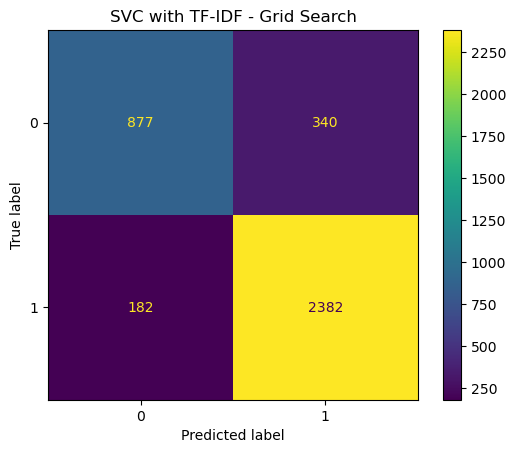

In [154]:
svm_tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 1))),
   ('clf', SVC(kernel='linear', C=1, gamma='auto')),
    #('clf', SVC(kernel='poly',degree = 3)),
])

# Define the parameters for GridSearchCV
parameters = {
    'tfidf__max_features': [3600, 5000],
    #'clf__C': [0.1, 1, 10, 100]
}

# Create a F1 scorer for micro average with the positive label as "fake"
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# Perform GridSearchCV
grid_search = GridSearchCV(svm_tfidf_pipeline, param_grid=parameters, scoring=f1_scorer, cv=5)
grid_search.fit(train_tweets['ProcessedText'], train_tweets['label'])

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
grid_search_pred = best_estimator.predict(test_tweets['ProcessedText'])

# Calculate F1 score for the best estimator
grid_search_f1 = f1_score(test_tweets['label'], grid_search_pred, average='binary')

# Display Confusion Matrix for the best estimator
conf_matrix_display_best = ConfusionMatrixDisplay.from_estimator(best_estimator, test_tweets['ProcessedText'], test_tweets['label'])
plt.title("SVC with TF-IDF - Grid Search")

# Print F1 score
print(f"Best Estimator F1 Score: {grid_search_f1}")
